In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "child-vs-mother-iq"

# **Import**

In [3]:
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(dplyr)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & Structure**

In [4]:
data_ch <- read.csv('/kaggle/input/child-vs-mother-iq/child_iq.csv')
data_ki <- read.csv('/kaggle/input/child-vs-mother-iq/kid_iq.csv')

**data_ch : child IQ at 3 (ppvt) vs mother's age (momage) and education (educ_cat)**
* **ppvt : child test score**
* **educ_cat : mother education (1 1 = no HS education, 2 = HS grad, 3 = some college, 4 = college grad)**
* **momage : mother age at childbirth**

**data_ki : child IQ score (kid_score) vs mother's education (mom_hs), mother's IQ (mom_iq), mother's job (mom_work) and age (mom_age)**
* **kid_score (ppvt)**
* **mom_hs(educ_cat) : 0 = no HS, 1 = at least HS grad**
* **mom_iq**
* **mom_work**
* **mom_age**

In [5]:
str(data_ch)

'data.frame':	400 obs. of  4 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ppvt    : int  120 89 78 42 115 97 94 68 103 94 ...
 $ educ_cat: int  2 1 2 1 4 1 1 2 3 3 ...
 $ momage  : int  21 17 19 20 26 20 20 24 19 24 ...


In [6]:
str(data_ki)

'data.frame':	434 obs. of  6 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ kid_score: int  65 98 85 83 115 98 69 106 102 95 ...
 $ mom_hs   : int  1 1 1 1 1 0 1 1 1 1 ...
 $ mom_iq   : num  121.1 89.4 115.4 99.4 92.7 ...
 $ mom_work : int  4 4 4 3 4 1 4 3 1 1 ...
 $ mom_age  : int  27 25 27 25 27 18 20 23 24 19 ...


In [7]:
describe(data_ch)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,400,200.5000,115.614301,200.5,200.50000,148.2600,1,400,399,0.0000000,-1.20900368,5.78071507
ppvt,2,400,86.9325,20.440094,90.0,88.11562,19.2738,20,144,124,-0.4699127,-0.16466771,1.02200469
educ_cat,3,400,2.1125,0.813325,2.0,2.05625,0.0000,1,4,3,0.5453014,-0.02862198,0.04066625
momage,4,400,22.7900,2.689607,23.0,22.72188,2.9652,17,29,12,0.1770753,-0.61701742,0.13448034


In [8]:
describe(data_ki)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,434,217.5000000,125.4292629,217.50000,217.5000000,160.86210,1.00000,434.0000,433.0000,0.0000000,-1.20829806,6.02079729
kid_score,2,434,86.7972350,20.4106885,90.00000,87.9252874,19.27380,20.00000,144.0000,124.0000,-0.4589763,-0.18539706,0.97974440
mom_hs,3,434,0.7857143,0.4107994,1.00000,0.8563218,0.00000,0.00000,1.0000,1.0000,-1.3878108,-0.07413605,0.01971900
mom_iq,4,434,100.0000000,15.0000000,97.91525,99.1127992,15.89087,71.03741,138.8931,67.8557,0.4651797,-0.58909594,0.72002304
mom_work,5,434,2.8963134,1.1813936,3.00000,2.9942529,1.48260,1.00000,4.0000,3.0000,-0.4451226,-1.38911949,0.05670871
mom_age,6,434,22.7857143,2.7010696,23.00000,22.7126437,2.96520,17.00000,29.0000,12.0000,0.1758653,-0.65063405,0.12965549


In [9]:
summary(data_ch)

       X              ppvt           educ_cat         momage     
 Min.   :  1.0   Min.   : 20.00   Min.   :1.000   Min.   :17.00  
 1st Qu.:100.8   1st Qu.: 74.00   1st Qu.:2.000   1st Qu.:21.00  
 Median :200.5   Median : 90.00   Median :2.000   Median :23.00  
 Mean   :200.5   Mean   : 86.93   Mean   :2.112   Mean   :22.79  
 3rd Qu.:300.2   3rd Qu.:102.00   3rd Qu.:3.000   3rd Qu.:25.00  
 Max.   :400.0   Max.   :144.00   Max.   :4.000   Max.   :29.00  

In [10]:
summary(data_ki)

       X           kid_score         mom_hs           mom_iq      
 Min.   :  1.0   Min.   : 20.0   Min.   :0.0000   Min.   : 71.04  
 1st Qu.:109.2   1st Qu.: 74.0   1st Qu.:1.0000   1st Qu.: 88.66  
 Median :217.5   Median : 90.0   Median :1.0000   Median : 97.92  
 Mean   :217.5   Mean   : 86.8   Mean   :0.7857   Mean   :100.00  
 3rd Qu.:325.8   3rd Qu.:102.0   3rd Qu.:1.0000   3rd Qu.:110.27  
 Max.   :434.0   Max.   :144.0   Max.   :1.0000   Max.   :138.89  
    mom_work        mom_age     
 Min.   :1.000   Min.   :17.00  
 1st Qu.:2.000   1st Qu.:21.00  
 Median :3.000   Median :23.00  
 Mean   :2.896   Mean   :22.79  
 3rd Qu.:4.000   3rd Qu.:25.00  
 Max.   :4.000   Max.   :29.00  

**Check missing value**

In [11]:
colSums(is.na(data_ch))

X     ppvt educ_cat   momage 
       0        0        0        0

In [12]:
colSums(is.na(data_ki))

X kid_score    mom_hs    mom_iq  mom_work   mom_age 
        0         0         0         0         0         0

**duplicate check**

In [13]:
sum(duplicated(data_ch))

[1] 0

In [14]:
sum(duplicated(data_ki))

[1] 0

In [15]:
head(data_ch)

,X,ppvt,educ_cat,momage
,<int>,<int>,<int>,<int>
1,1,120,2,21
2,2,89,1,17
3,3,78,2,19
4,4,42,1,20
5,5,115,4,26
6,6,97,1,20


In [16]:
head(data_ki)

,X,kid_score,mom_hs,mom_iq,mom_work,mom_age
,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1,65,1,121.11753,4,27
2,2,98,1,89.36188,4,25
3,3,85,1,115.44316,4,27
4,4,83,1,99.44964,3,25
5,5,115,1,92.74571,4,27
6,6,98,0,107.90184,1,18


# **2. Data Transfrom**

In [17]:
names(data_ch) <- c('X','kid_score', 'mom_education','mom_age')
names(data_ki) <- c('X','kid_score', 'mom_education','mom_iq','mom_work','mom_age')

**Data Check**

In [18]:
head(data_ch)

,X,kid_score,mom_education,mom_age
,<int>,<int>,<int>,<int>
1,1,120,2,21
2,2,89,1,17
3,3,78,2,19
4,4,42,1,20
5,5,115,4,26
6,6,97,1,20


In [19]:
head(data_ki)

,X,kid_score,mom_education,mom_iq,mom_work,mom_age
,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1,65,1,121.11753,4,27
2,2,98,1,89.36188,4,25
3,3,85,1,115.44316,4,27
4,4,83,1,99.44964,3,25
5,5,115,1,92.74571,4,27
6,6,98,0,107.90184,1,18


# **3. Data Visualization**

**data_ch Histogram**

In [20]:
ch_num_cols <- colnames(data_ch[,2:4])
ki_num_cols <- colnames(data_ki[,2:6])

In [21]:
p1 <- ggplot(data_ch) +
            geom_histogram(aes(x=kid_score), bins = 30, col = 'white') +
            theme_bw() + ggtitle('kid_score Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

p2 <- ggplot(data_ch) +
            geom_histogram(aes(x=mom_education), bins = 30, col = 'white')  +
            theme_bw() + ggtitle('mom_education Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

p3 <- ggplot(data_ch) +
            geom_histogram(aes(x=mom_age), bins = 30, col = 'white') +
            theme_bw() + ggtitle('mom_age Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

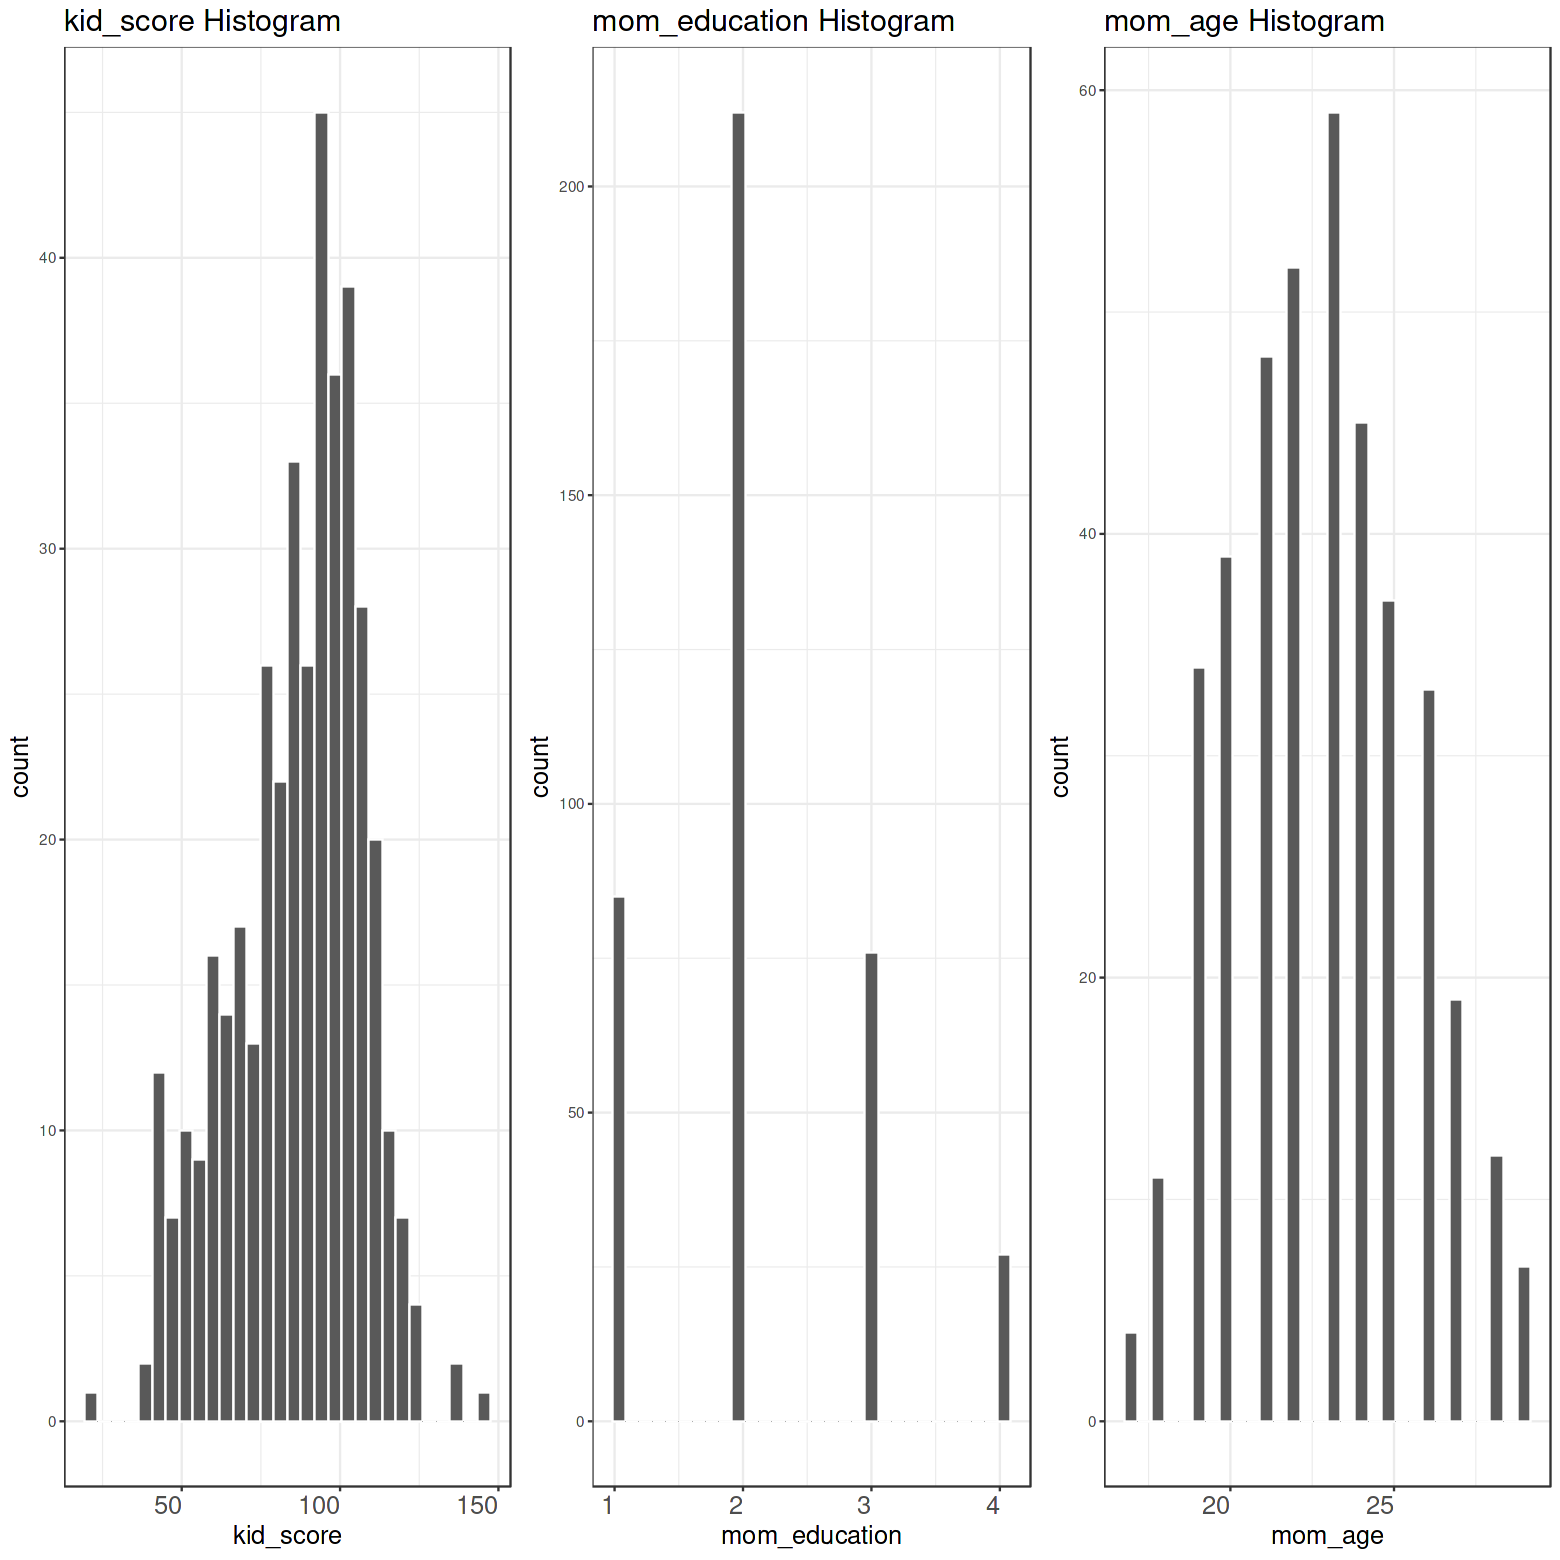

In [22]:
grid.arrange(p1,p2,p3 ,ncol = 3)

**data_ki histogram**

In [23]:
p1 <- ggplot(data_ki) +
            geom_histogram(aes(x=kid_score), bins = 30, col = 'white') +
            theme_bw() + ggtitle('kid_score Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

p2 <- ggplot(data_ki) +
            geom_histogram(aes(x=mom_education), bins = 30, col = 'white')  +
            theme_bw() + ggtitle('mom_education Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

p3 <- ggplot(data_ki) +
            geom_histogram(aes(x=mom_iq), bins = 30, col = 'white') +
            theme_bw() + ggtitle('mom_iq Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

p4 <- ggplot(data_ki) +
            geom_histogram(aes(x=mom_work), bins = 30, col = 'white') +
            theme_bw() + ggtitle('mom_work Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

p5 <- ggplot(data_ki) +
            geom_histogram(aes(x=mom_age), bins = 30, col = 'white') +
            theme_bw() + ggtitle('mom_age Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

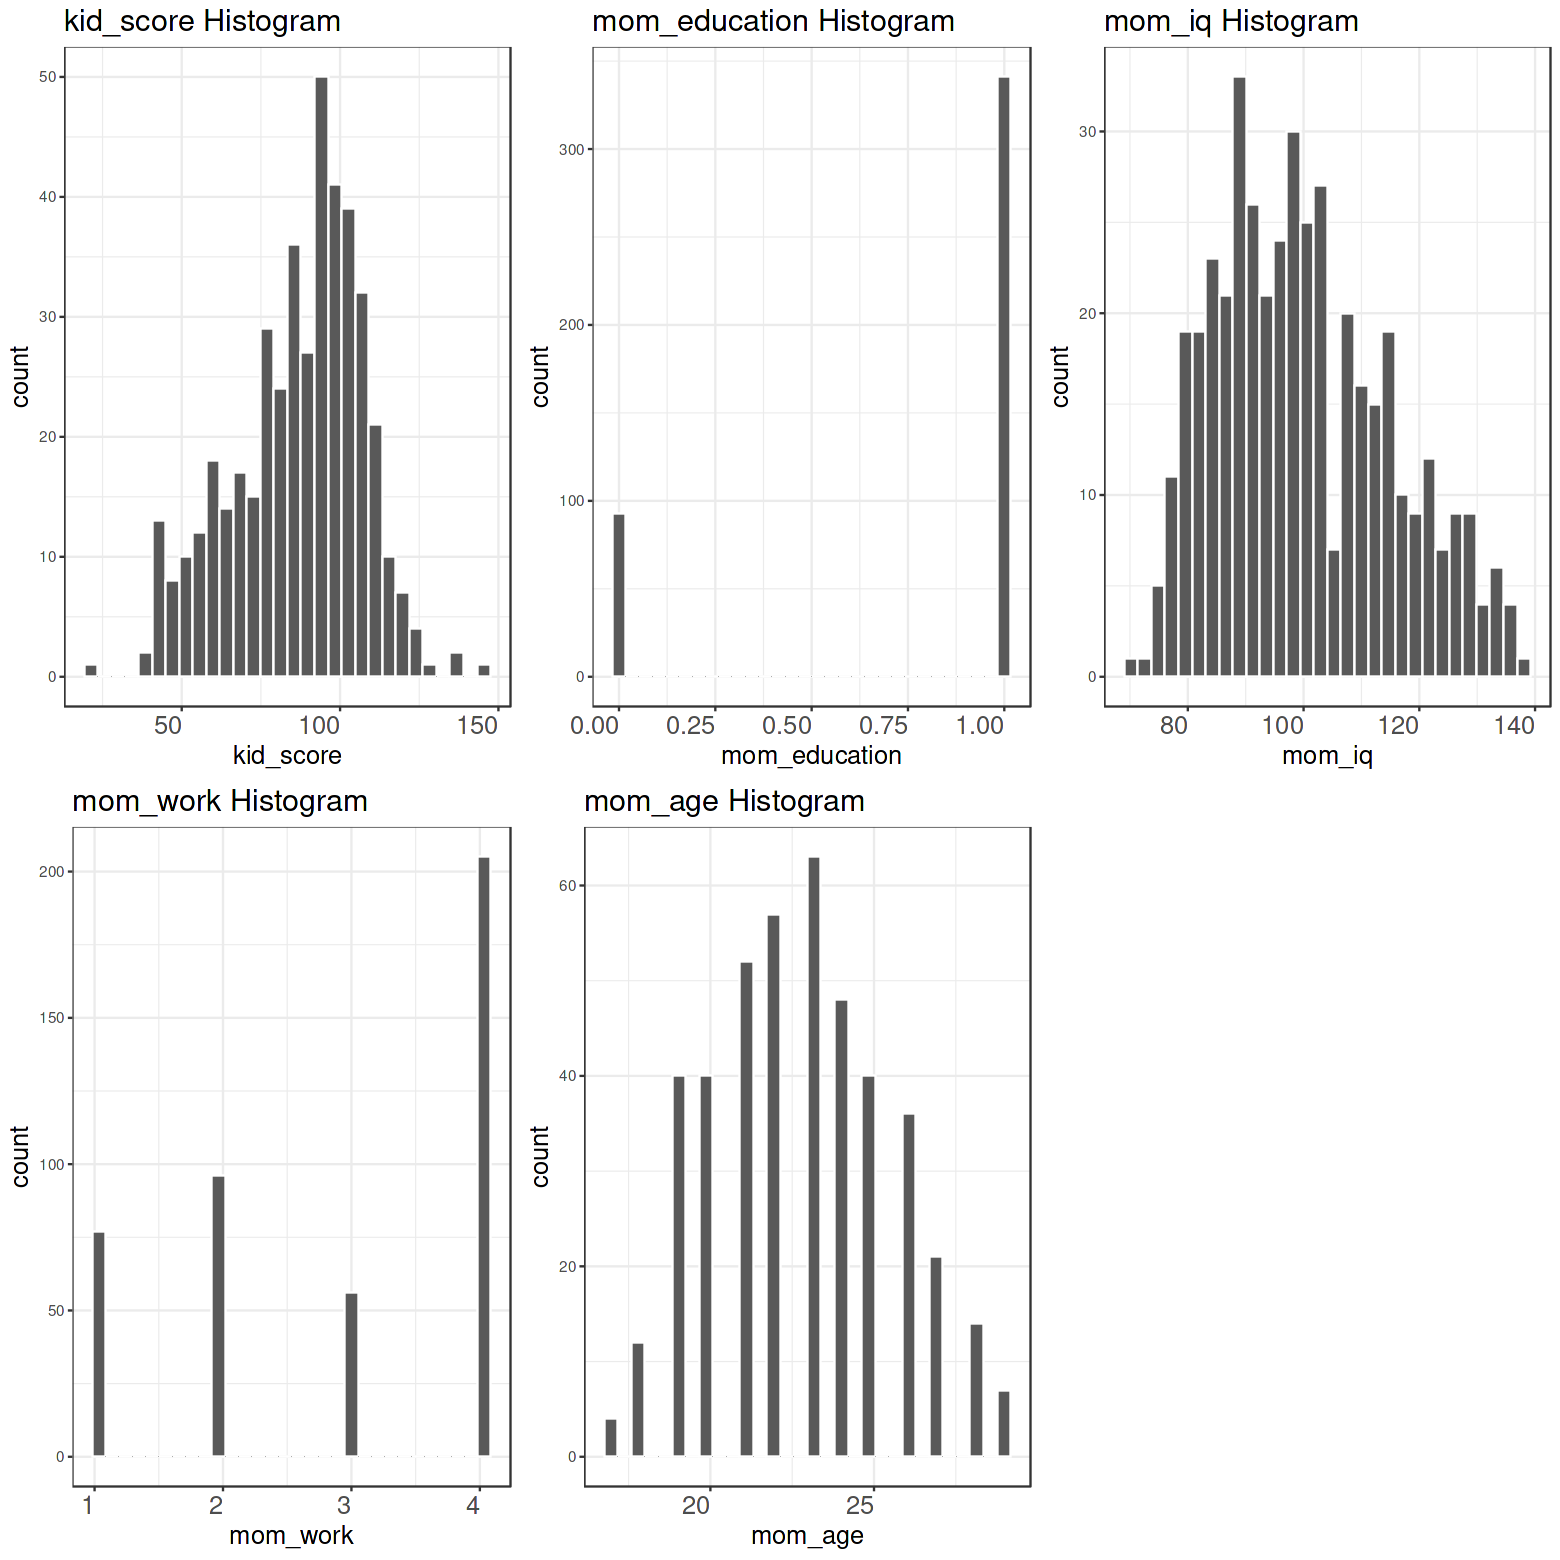

In [24]:
grid.arrange(p1,p2,p3,p4,p5 , ncol = 3)

--------

**data_ch Boxplot**

In [25]:
p1 <- ggplot(data_ch) +
        geom_boxplot(aes(y=kid_score), fill = 'skyblue') +
        theme_bw() + ggtitle('kid_score Boxplot') + 
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )
p2 <- ggplot(data_ch) +
        geom_boxplot(aes(y=mom_age), fill = 'skyblue') +
        theme_bw() + ggtitle('mom_age Boxplot') + 
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

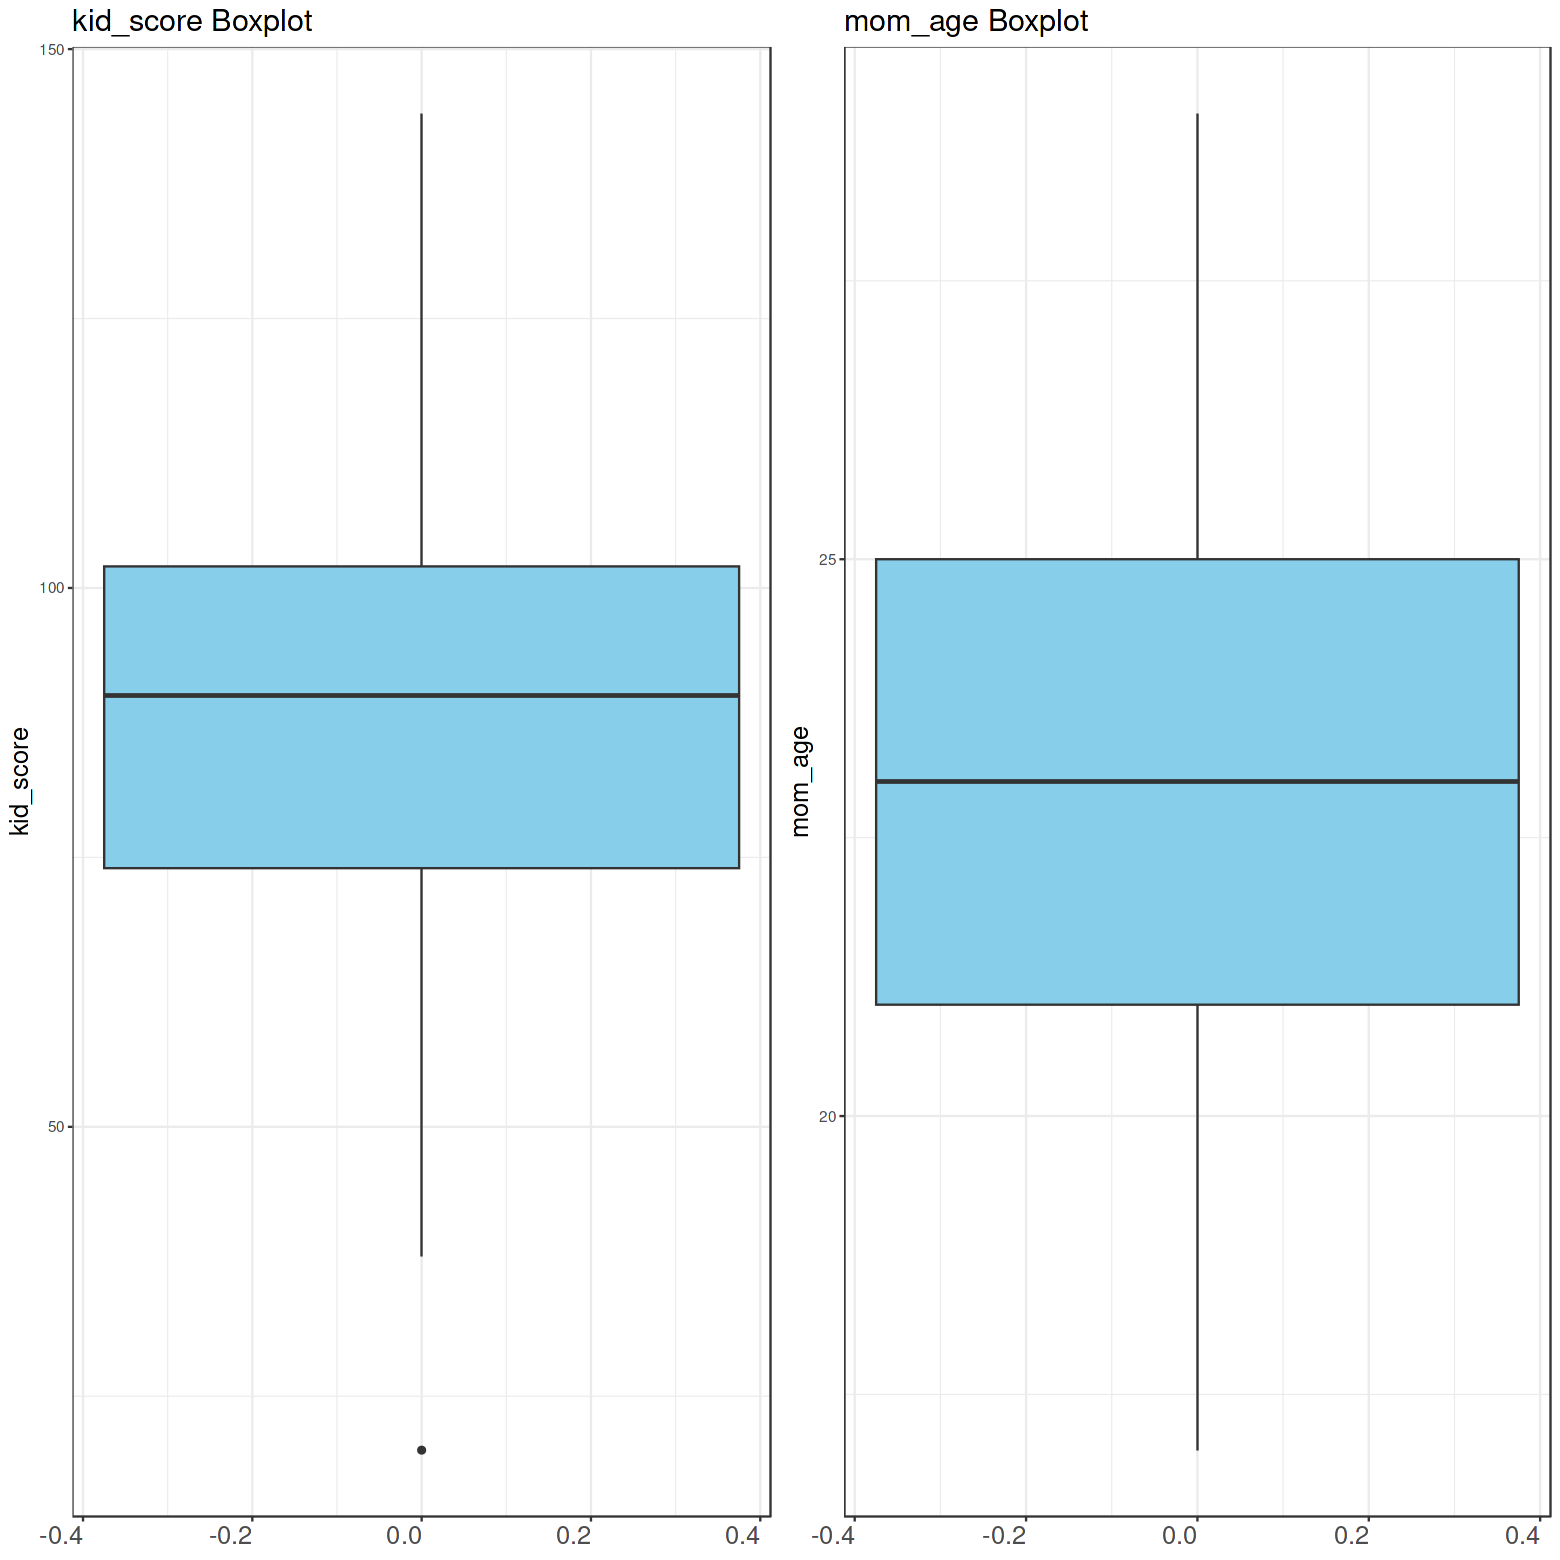

In [26]:
grid.arrange(p1,p2 , ncol=2)

**data_ki Boxplot**

In [27]:
p1 <- ggplot(data_ki) +
        geom_boxplot(aes(y=kid_score), fill = 'orange') +
        theme_bw() + ggtitle('kid_score Boxplot') + 
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(data_ki) +
        geom_boxplot(aes(y=mom_iq), fill = 'orange') +
        theme_bw() + ggtitle('mom_iq Boxplot') + 
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p3 <- ggplot(data_ki) +
        geom_boxplot(aes(y=mom_age), fill = 'orange') +
        theme_bw() + ggtitle('mom_age Boxplot') + 
        theme(axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

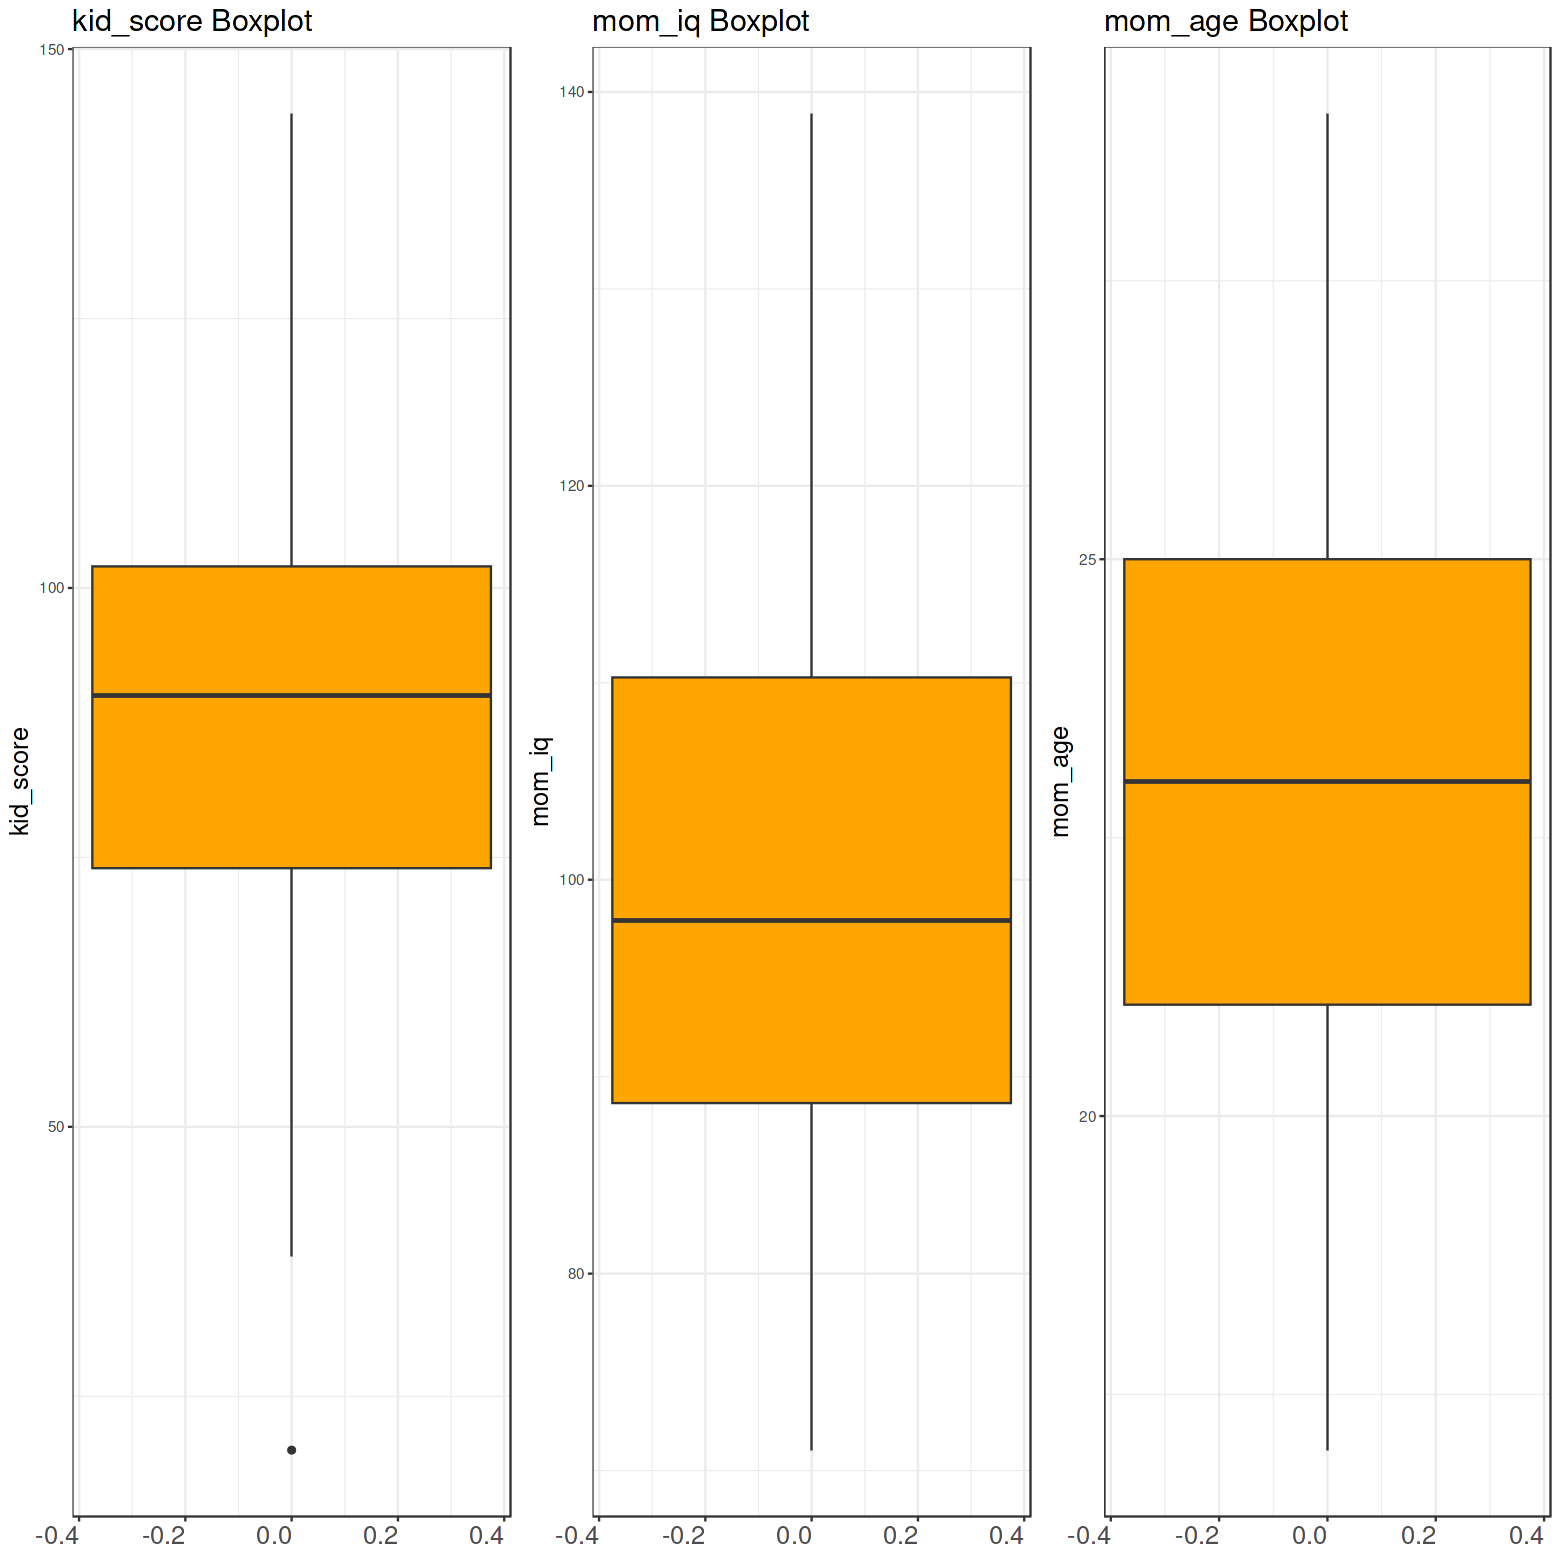

In [28]:
grid.arrange(p1,p2,p3 , ncol=3)

------

**data_ch Average KidScore by mother's education**

In [29]:
ch_kidscore_byeduc <- data_ch %>%
                        group_by(mom_education) %>%
                        summarize(avg_kidscore = mean(kid_score,na.rm=T))

ch_kidscore_byeduc$mom_education <- as.factor(ch_kidscore_byeduc$mom_education)

In [30]:
ch_kidscore_byeduc

mom_education,avg_kidscore
<fct>,<dbl>
1,78.44706
2,88.70283
3,87.78947
4,97.33333


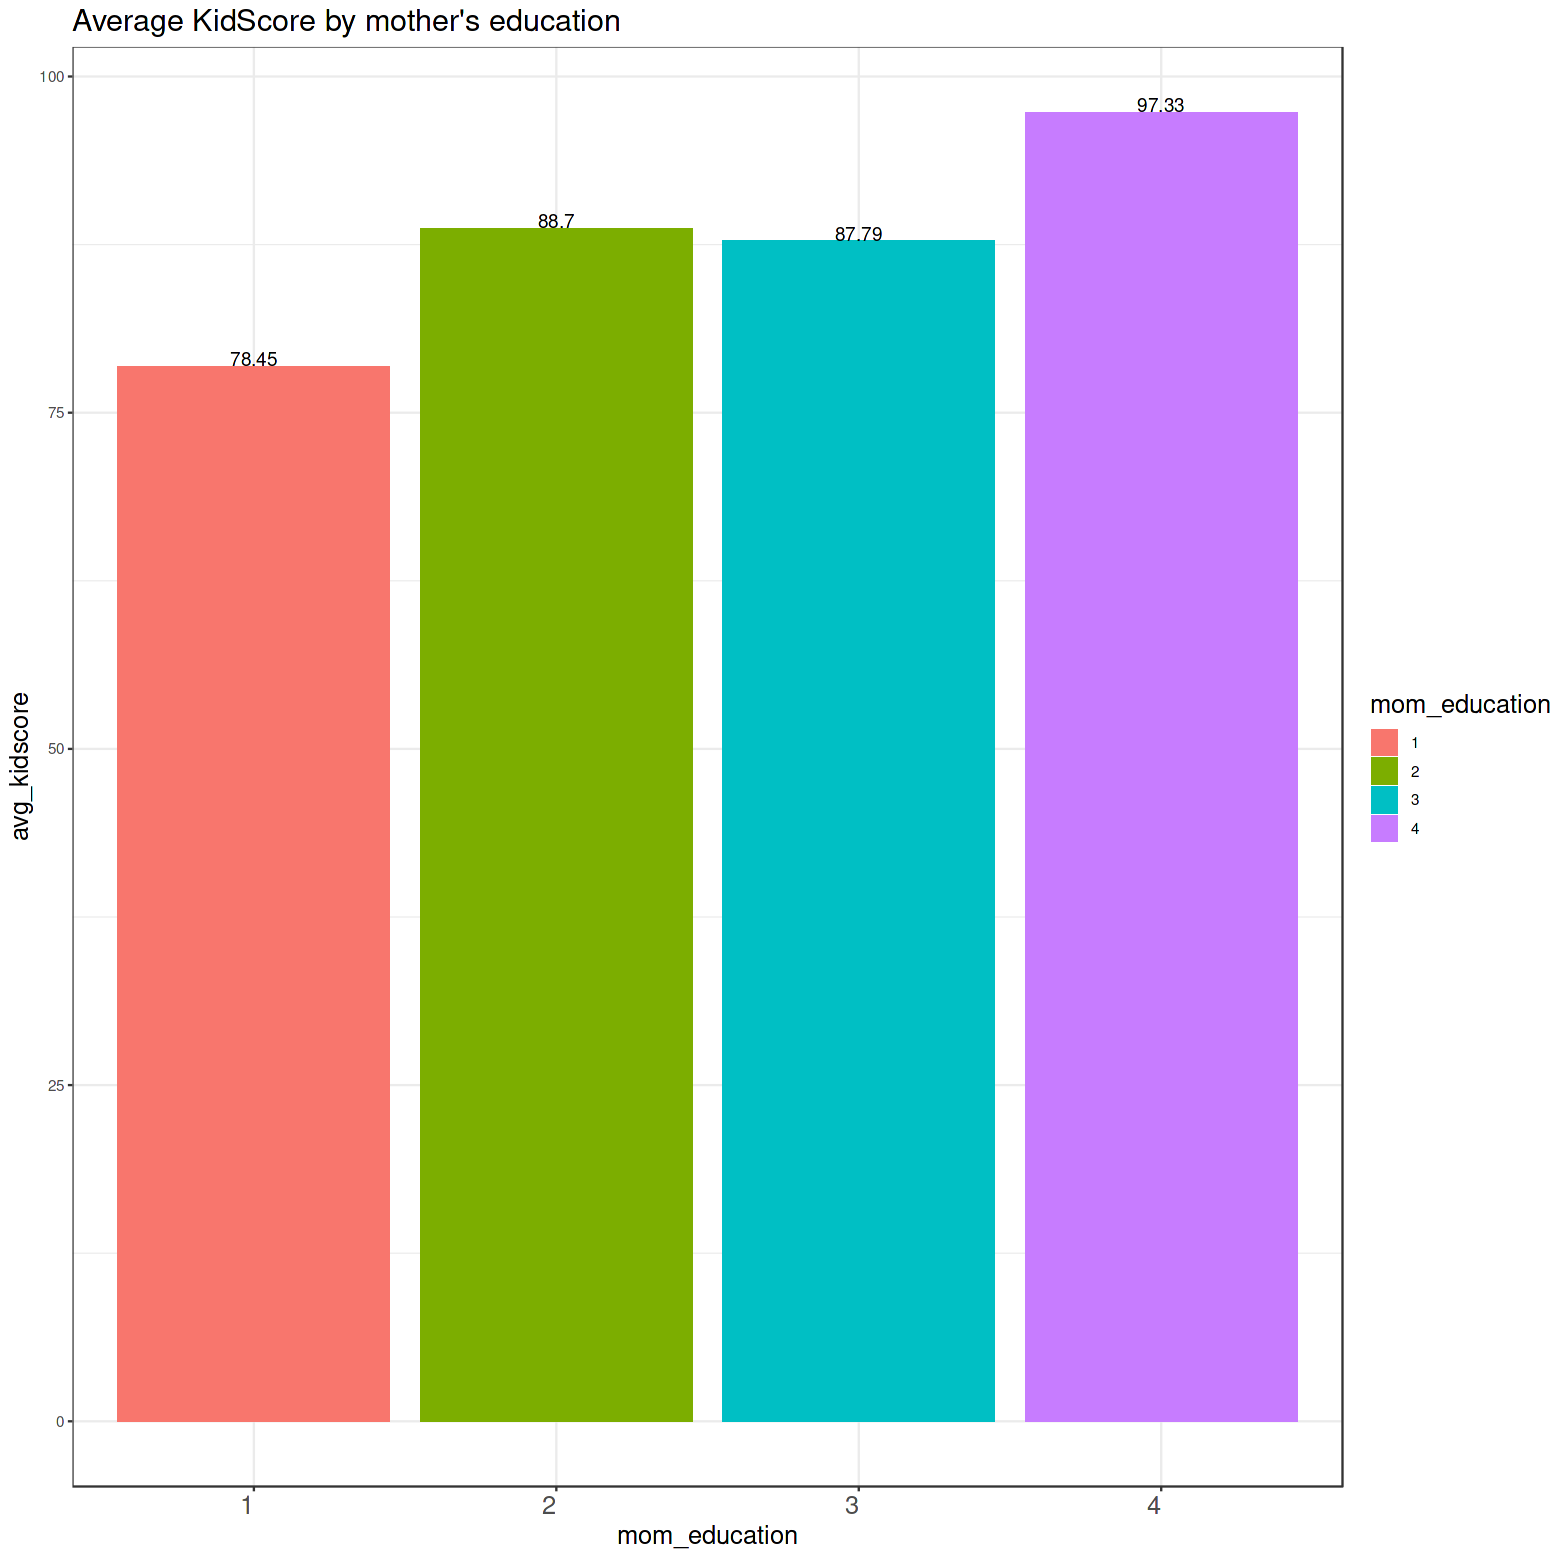

In [31]:
ggplot(ch_kidscore_byeduc) +
            geom_col(aes(x=mom_education, y = avg_kidscore, fill = mom_education))+
            geom_text(aes(x=mom_education, y = avg_kidscore, label= round(avg_kidscore,2), vjust=0))+
            ggtitle('Average KidScore by mother\'s education') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )


**data_ki Average KidScore by mother's education**

In [32]:
ki_kidscore_byeduc <- data_ki %>%
                        group_by(mom_education) %>%
                        summarize(avg_kidscore = mean(kid_score,na.rm=T))

ki_kidscore_byeduc$mom_education <- as.factor(ki_kidscore_byeduc$mom_education)

In [33]:
ki_kidscore_byeduc

mom_education,avg_kidscore
<fct>,<dbl>
0,77.54839
1,89.31965


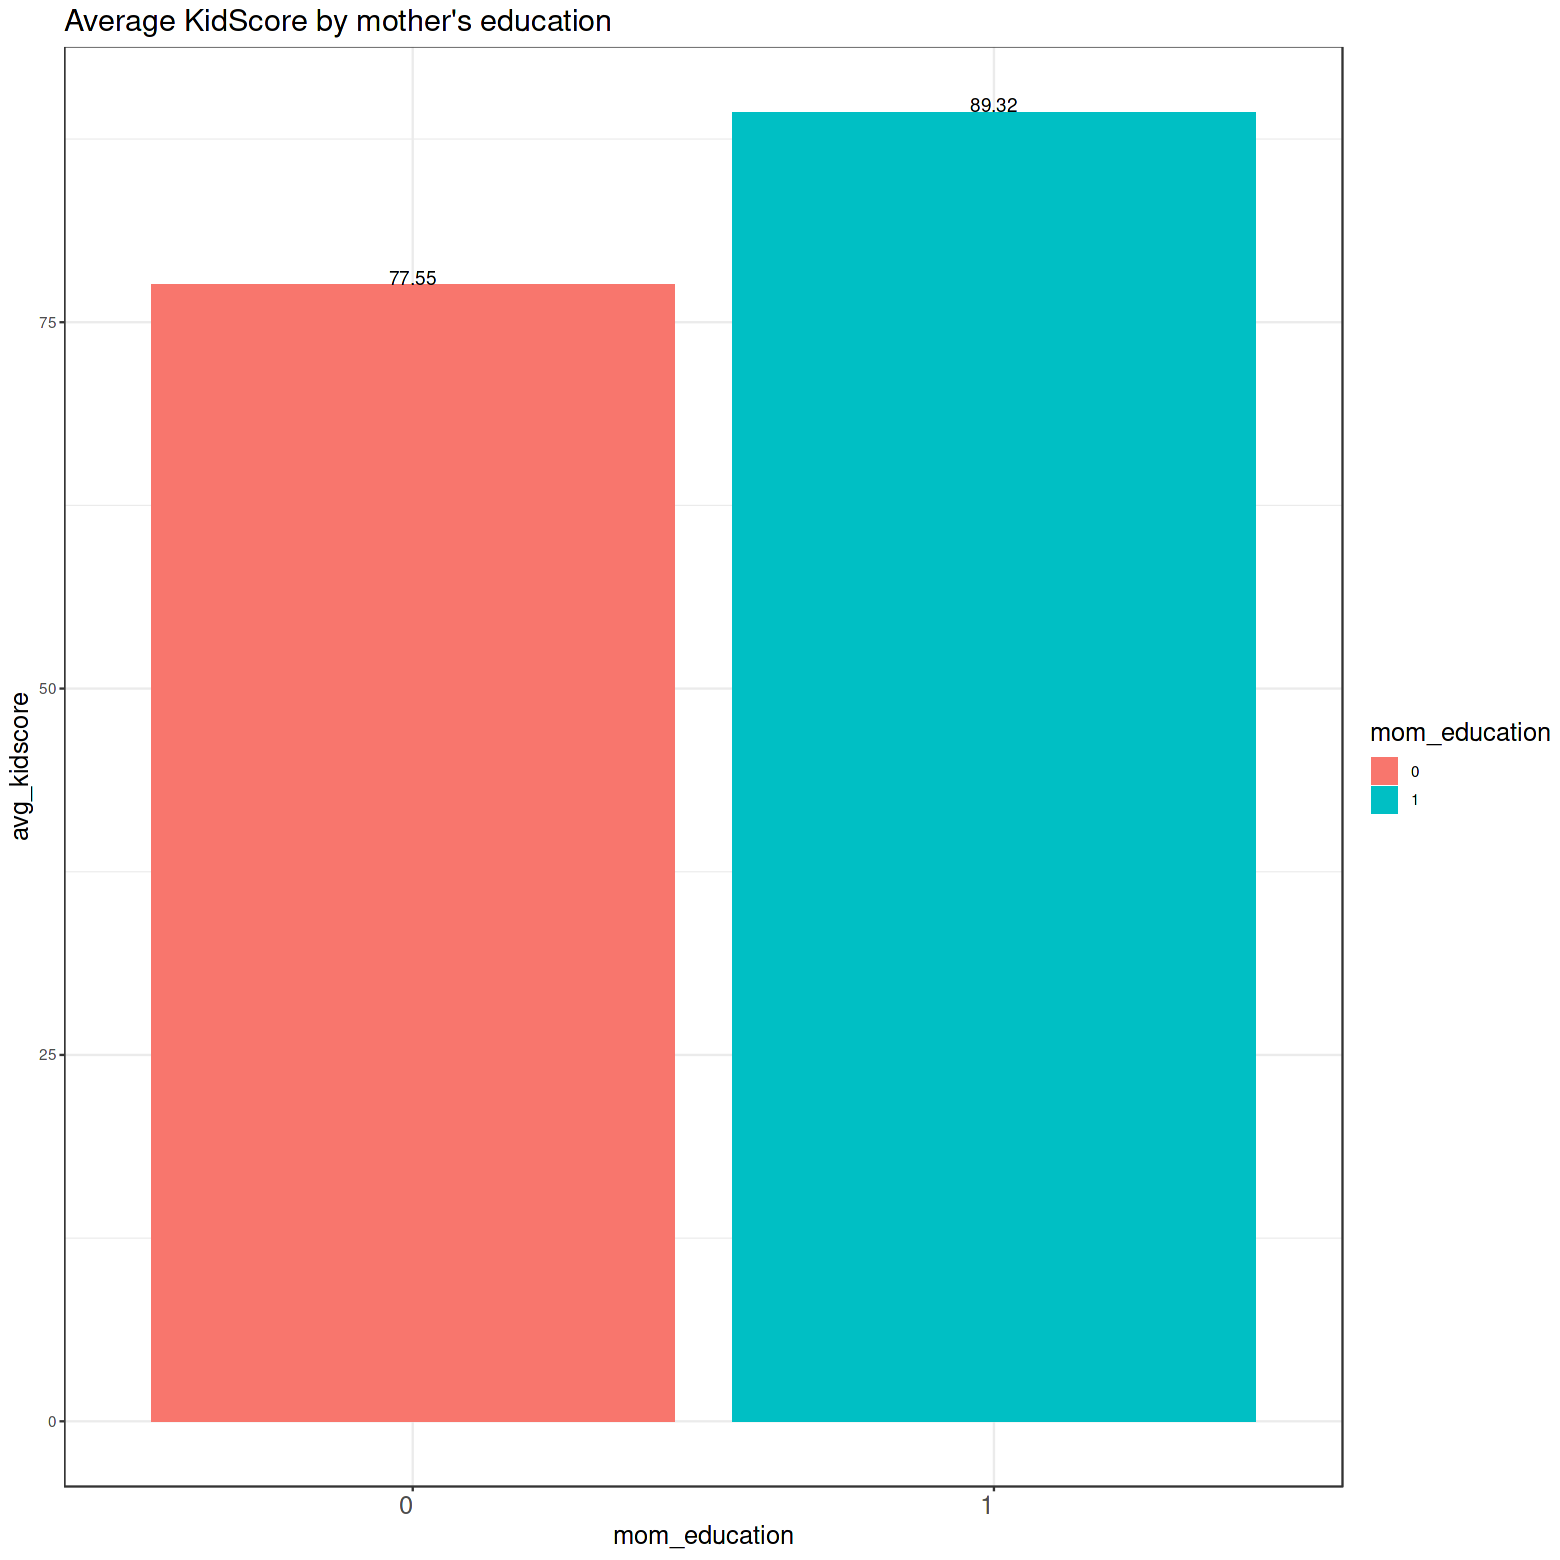

In [34]:
ggplot(ki_kidscore_byeduc) +
            geom_col(aes(x=mom_education, y = avg_kidscore, fill = mom_education))+
            geom_text(aes(x=mom_education, y = avg_kidscore, label= round(avg_kidscore,2), vjust=0))+
            ggtitle('Average KidScore by mother\'s education') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

-------

**Average mom_iq by mother\'s education**

In [35]:
ki_momiq_byeduc <- data_ki %>%
                        group_by(mom_education) %>%
                        summarize(avg_momiq = mean(mom_iq,na.rm=T))

ki_momiq_byeduc$mom_education <- as.factor(ki_momiq_byeduc$mom_education)

In [36]:
ki_momiq_byeduc

mom_education,avg_momiq
<fct>,<dbl>
0,91.88915
1,102.21205


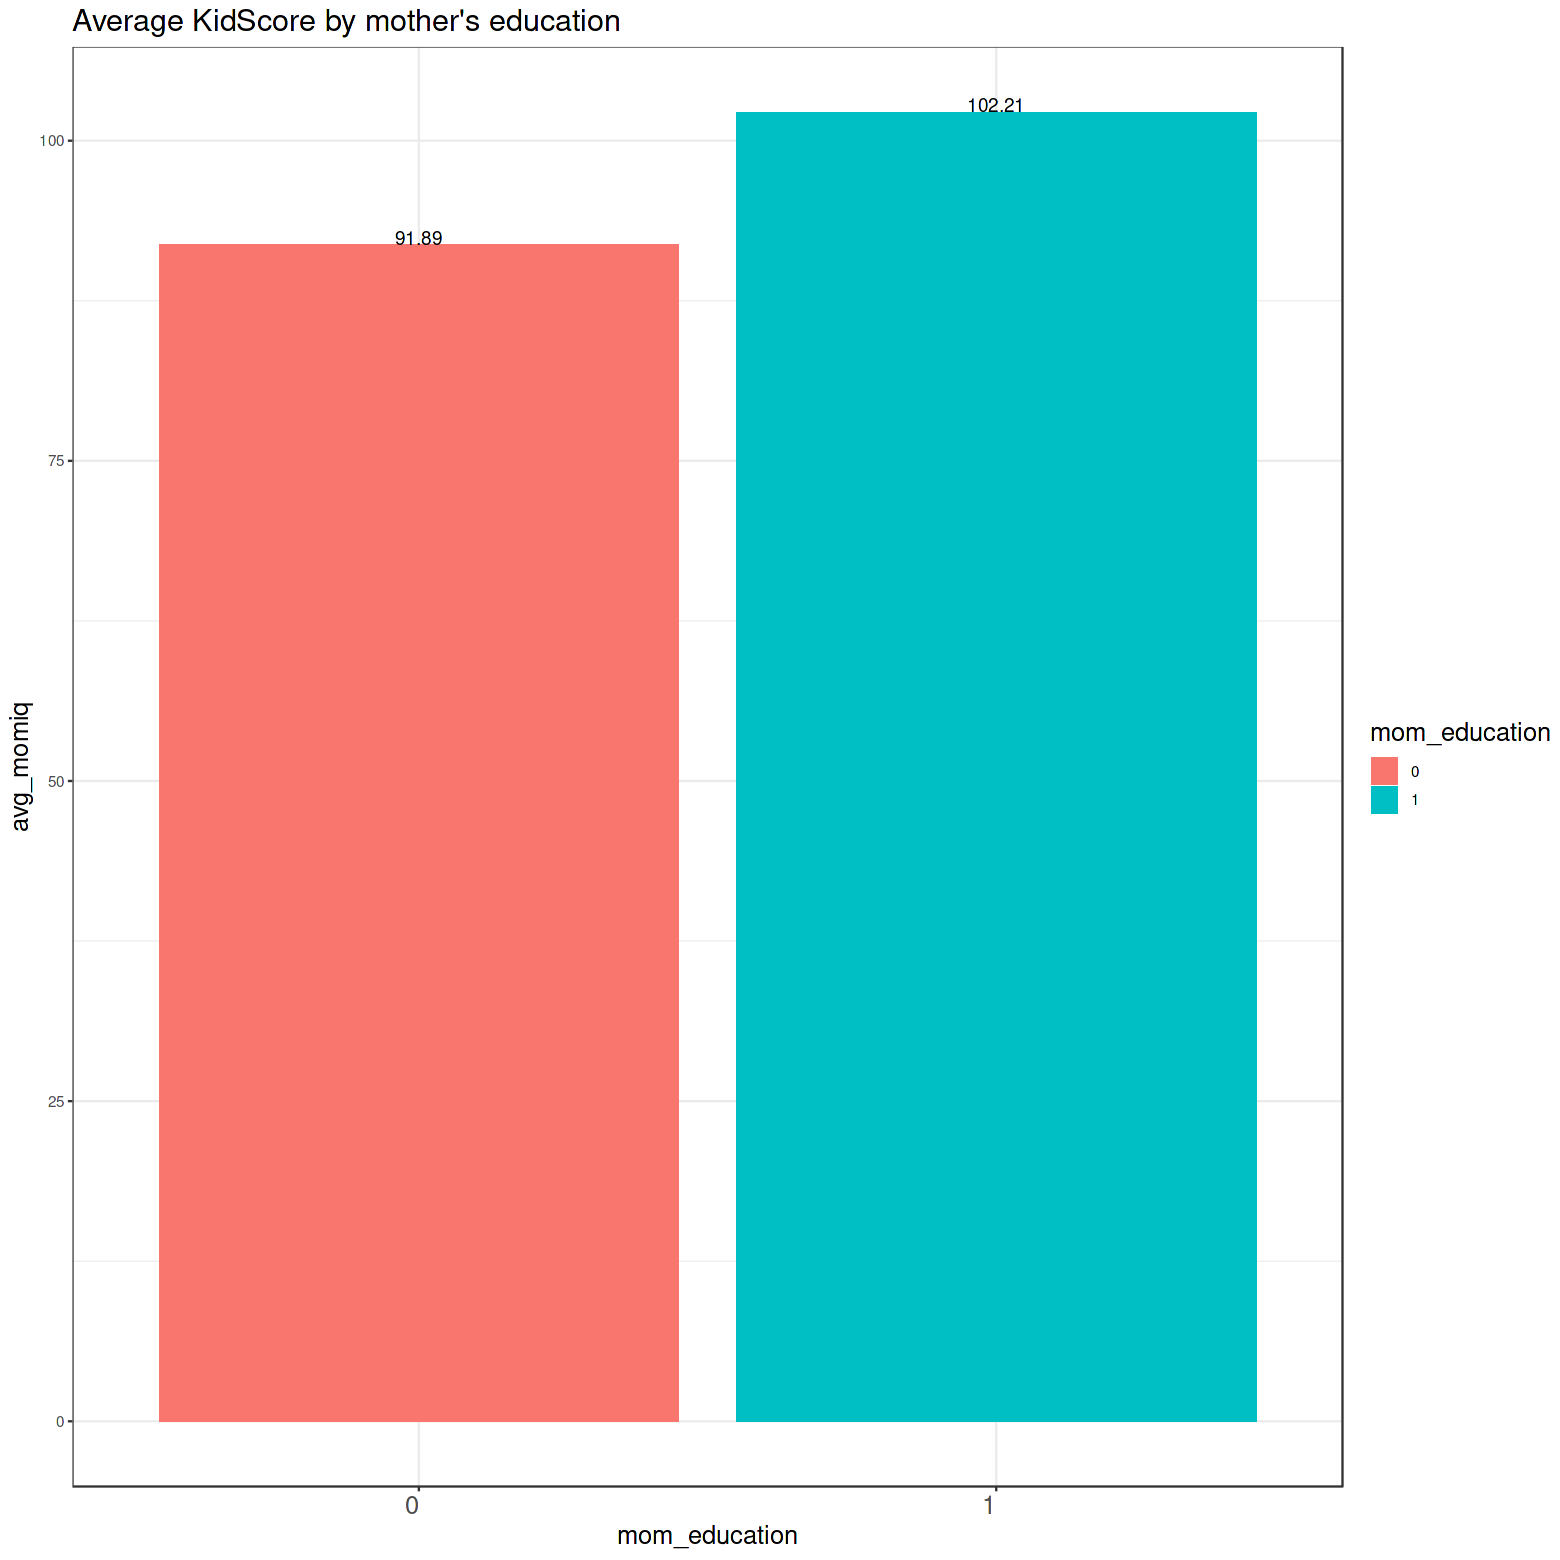

In [37]:
ggplot(ki_momiq_byeduc) +
            geom_col(aes(x=mom_education, y = avg_momiq, fill = mom_education))+
            geom_text(aes(x=mom_education, y = avg_momiq, label= round(avg_momiq,2), vjust=0))+
            ggtitle('Average KidScore by mother\'s education') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

-------

**Correlation**

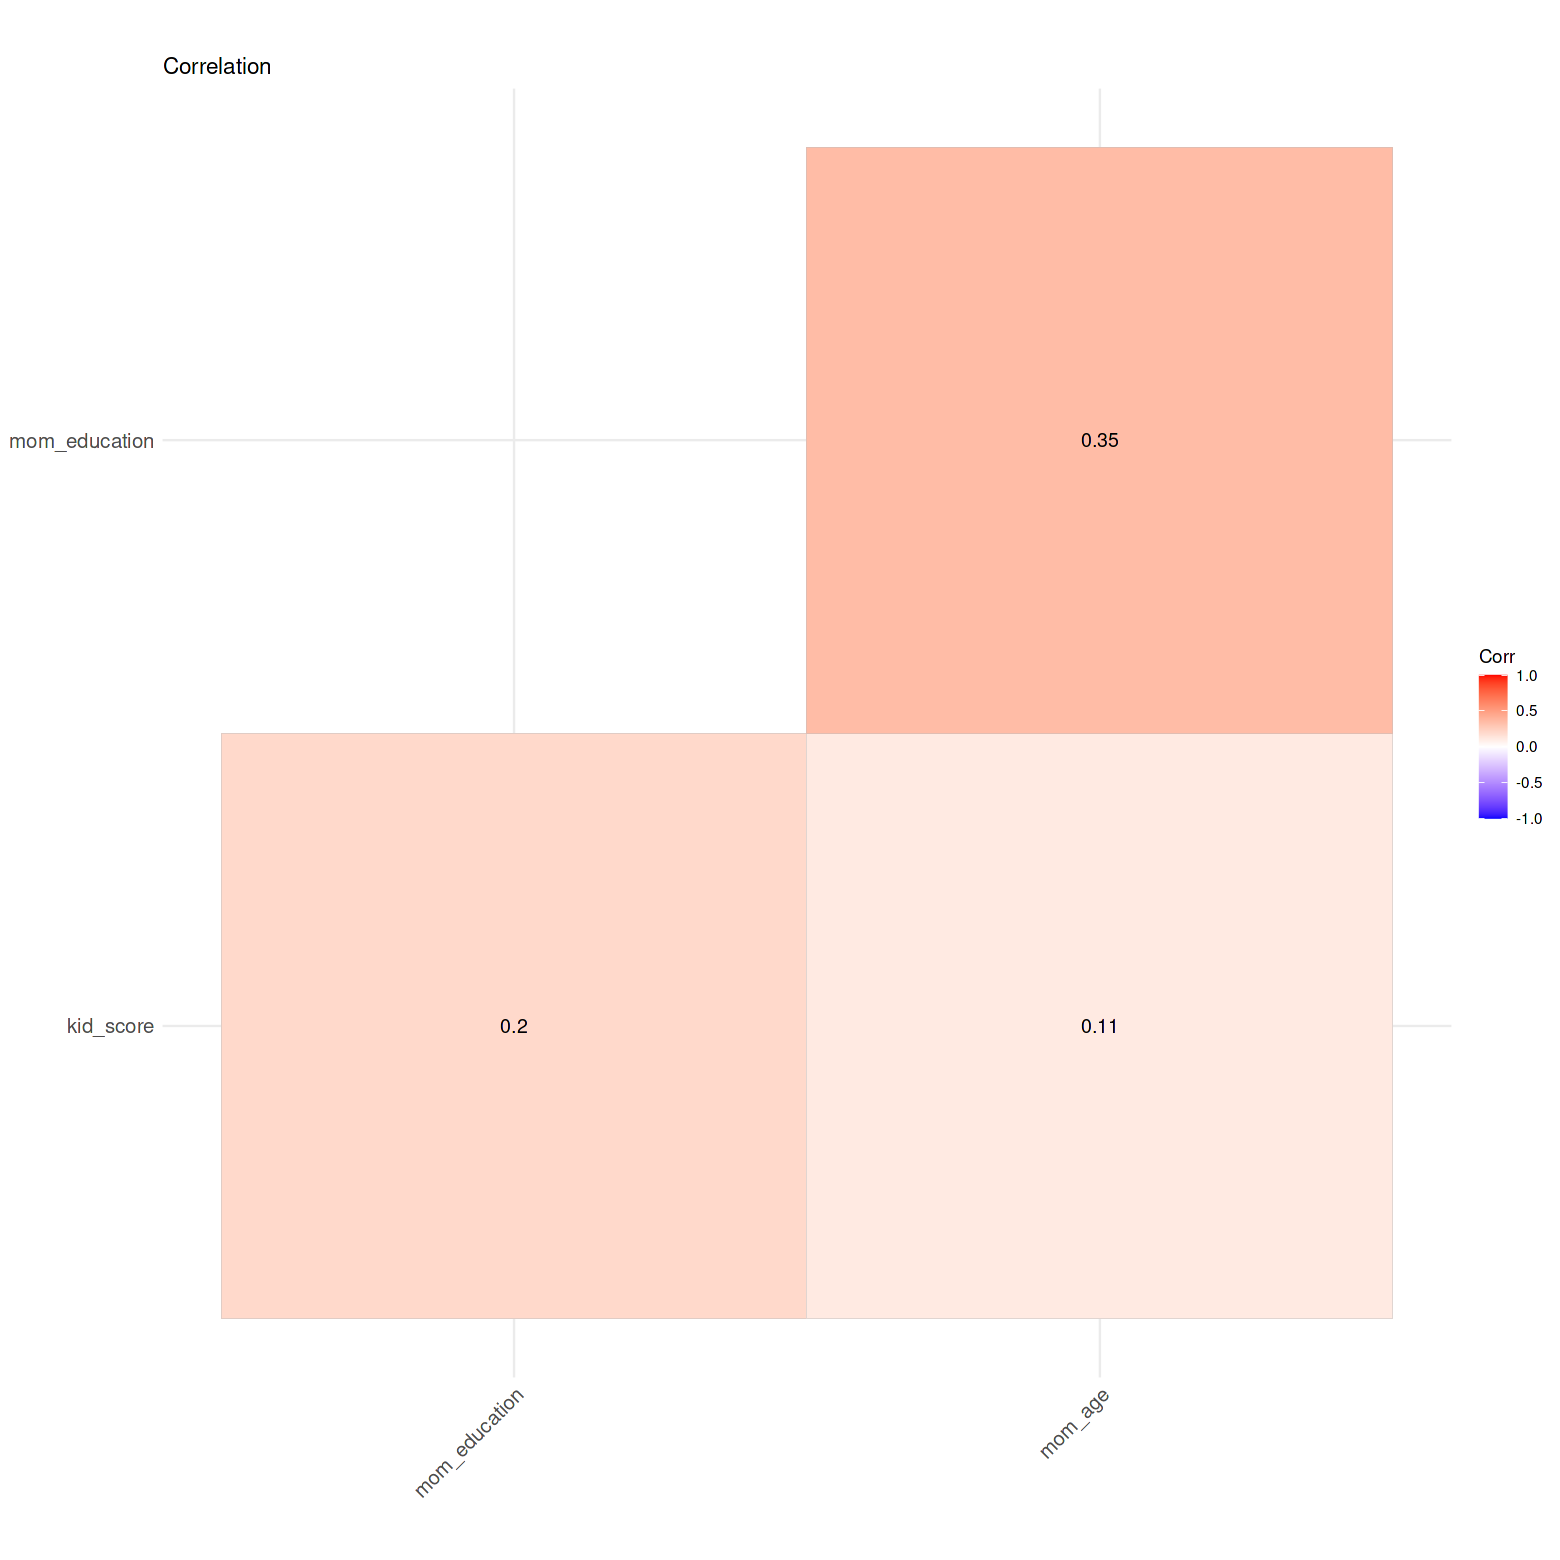

In [38]:
ggcorrplot(cor(data_ch[,2:4]) , type = "lower", lab=T, title = 'Correlation')

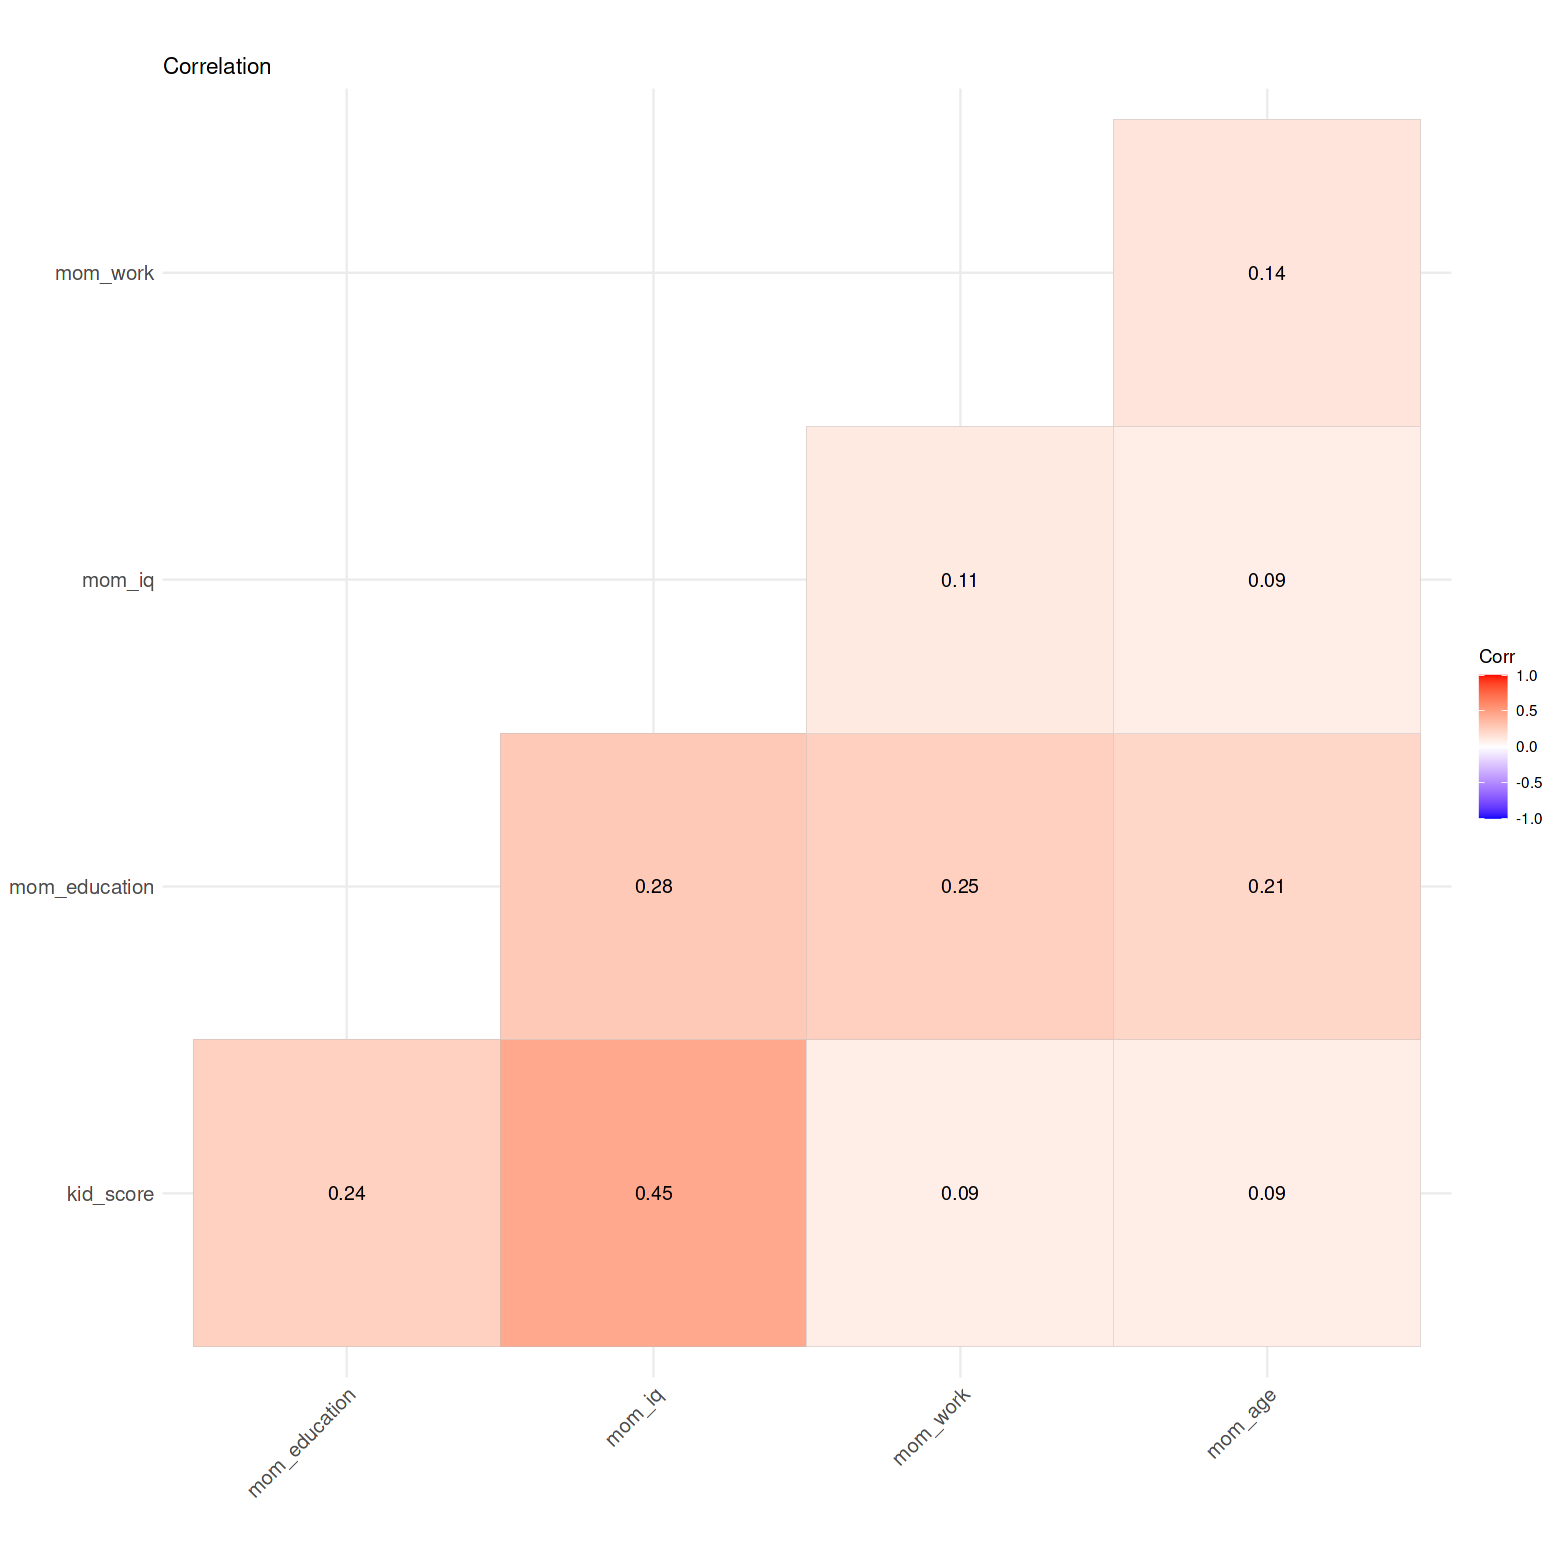

In [39]:
ggcorrplot(cor(data_ki[,2:6]) , type = "lower", lab=T, title = 'Correlation')

--------

# **4. Modeling**

In [40]:
library(randomForest)
library(Metrics)
library(caret)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [41]:
data_ch <- data_ch[,c('kid_score','mom_education','mom_age')]
data_ki <- data_ki[,c('kid_score','mom_education','mom_iq','mom_work','mom_age')]

**data_ch kid_score LinearRegression**

In [42]:
ch_lm <- lm(kid_score ~., data_ch)

In [43]:
summary(ch_lm)


Call:
lm(formula = kid_score ~ ., data = data_ch)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.763 -13.130   2.495  14.620  55.610 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    69.1554     8.5706   8.069 8.51e-15 ***
mom_education   4.7114     1.3165   3.579 0.000388 ***
mom_age         0.3433     0.3981   0.862 0.389003    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.05 on 397 degrees of freedom
Multiple R-squared:  0.04309,	Adjusted R-squared:  0.03827 
F-statistic: 8.939 on 2 and 397 DF,  p-value: 0.0001594


In [44]:
ch_bestlmmd <- step(ch_lm, direction = 'both')

Start:  AIC=2401.38
kid_score ~ mom_education + mom_age

                Df Sum of Sq    RSS    AIC
- mom_age        1     298.8 159816 2400.1
<none>                       159517 2401.4
- mom_education  1    5145.9 164663 2412.1

Step:  AIC=2400.13
kid_score ~ mom_education

                Df Sum of Sq    RSS    AIC
<none>                       159816 2400.1
+ mom_age        1     298.8 159517 2401.4
- mom_education  1    6885.0 166701 2415.0


In [45]:
summary(ch_bestlmmd)


Call:
lm(formula = kid_score ~ mom_education, data = data_ch)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.251 -13.662   2.535  14.669  54.749 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     76.143      2.792  27.275  < 2e-16 ***
mom_education    5.107      1.233   4.141 4.23e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.04 on 398 degrees of freedom
Multiple R-squared:  0.0413,	Adjusted R-squared:  0.03889 
F-statistic: 17.15 on 1 and 398 DF,  p-value: 4.228e-05


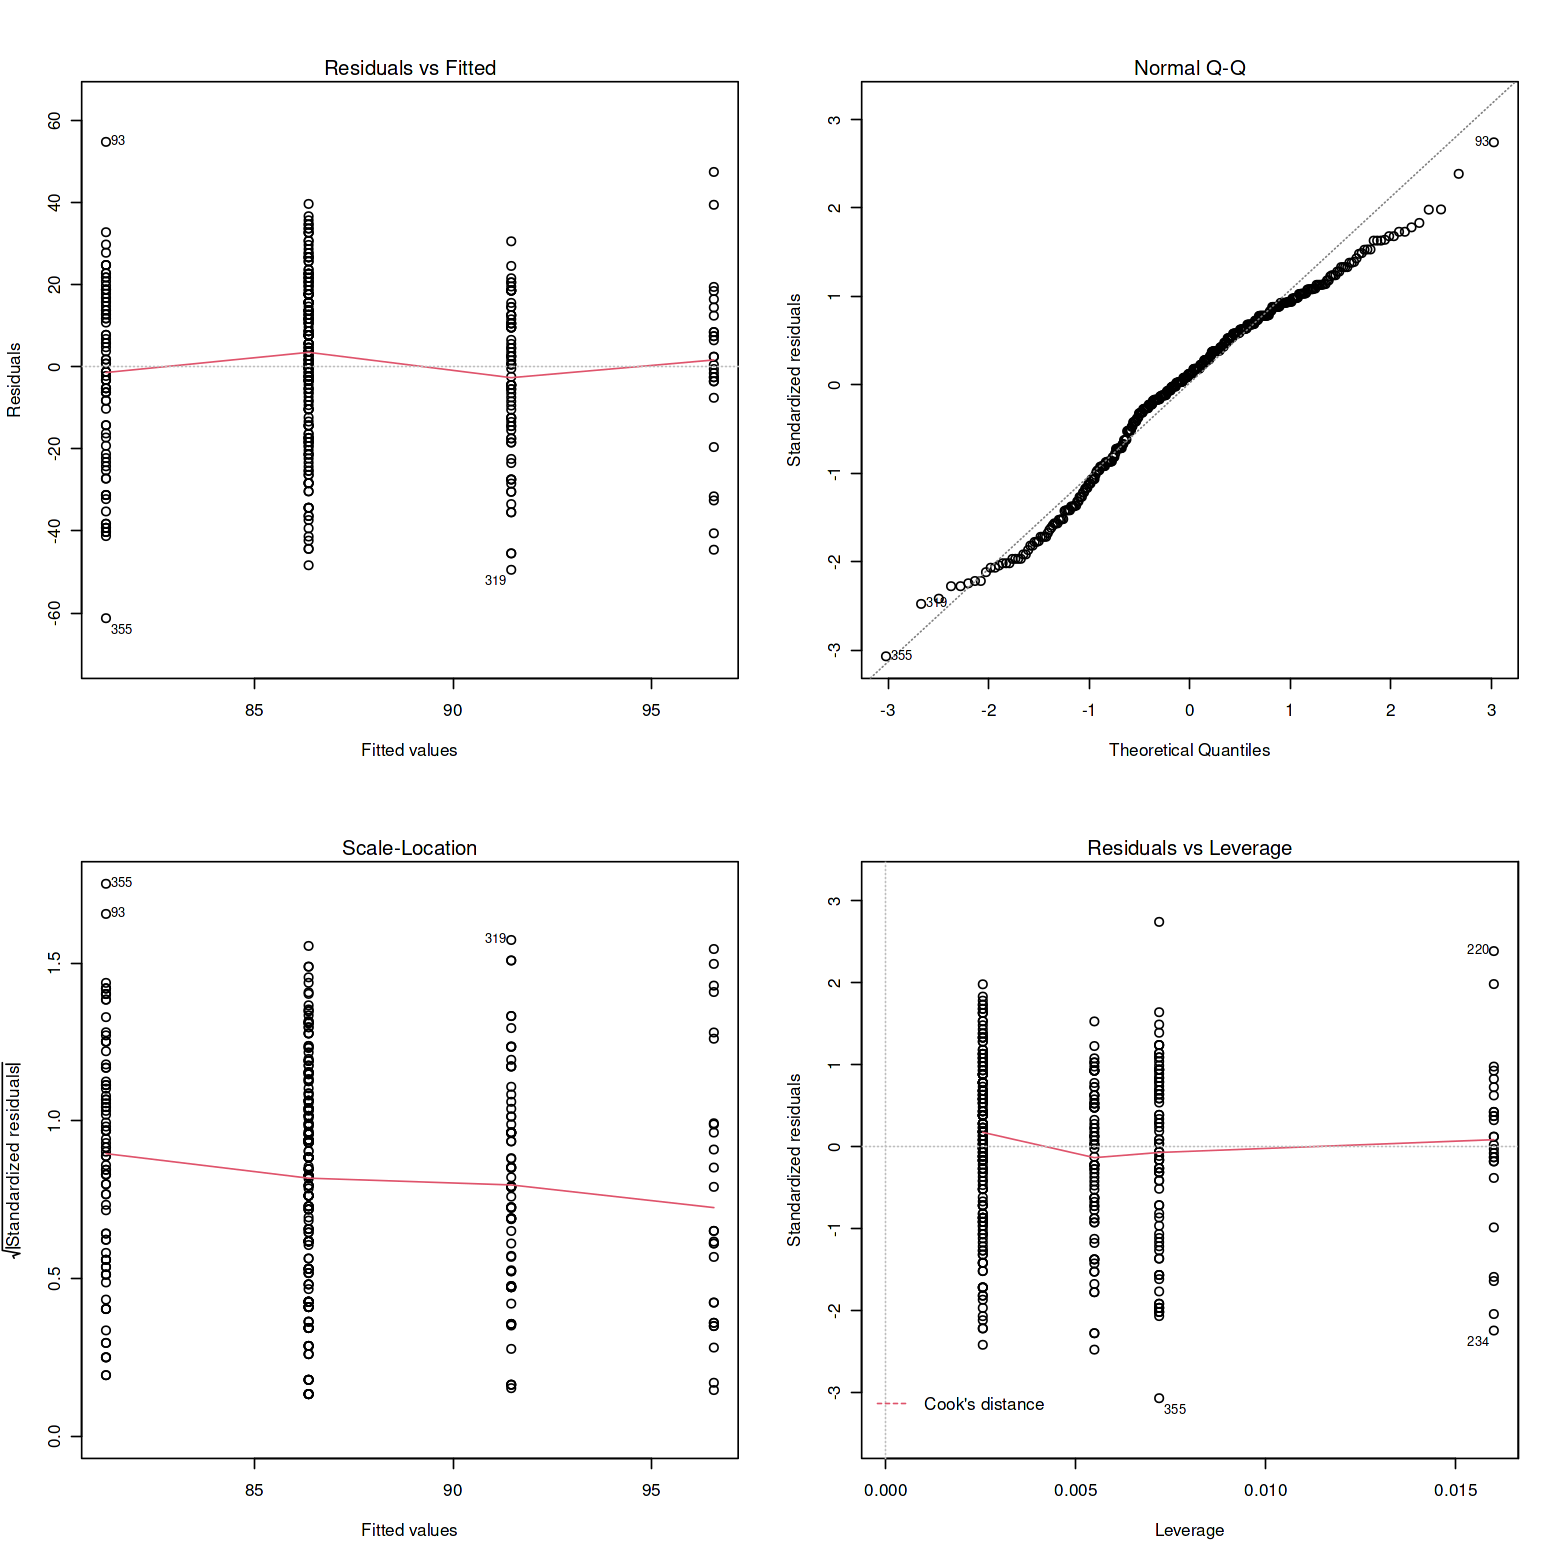

In [46]:
par(mfrow=c(2,2))
plot(ch_bestlmmd)

In [47]:
ch_pred <- predict(ch_bestlmmd , data_ch)

In [48]:
mse(data_ch$kid_score, ch_pred)

[1] 399.5405

In [49]:
rmse(data_ch$kid_score, ch_pred)

[1] 19.98851

In [50]:
R2(data_ch$kid_score, ch_pred)

[1] 0.04130134

**Model has low R2 score.**

---------

**data_ki kid_score LinearRegression**

In [51]:
ki_lm <- lm(kid_score ~., data_ki)

In [52]:
summary(ki_lm)


Call:
lm(formula = kid_score ~ ., data = data_ki)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.134 -12.624   2.293  11.250  50.206 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.82261    9.18765   2.266   0.0239 *  
mom_education  5.56118    2.31345   2.404   0.0166 *  
mom_iq         0.56208    0.06077   9.249   <2e-16 ***
mom_work       0.13373    0.76763   0.174   0.8618    
mom_age        0.21986    0.33231   0.662   0.5086    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.17 on 429 degrees of freedom
Multiple R-squared:  0.215,	Adjusted R-squared:  0.2077 
F-statistic: 29.38 on 4 and 429 DF,  p-value: < 2.2e-16


In [53]:
ki_bestlmmd <- step(ki_lm, direction = 'both')

Start:  AIC=2521.85
kid_score ~ mom_education + mom_iq + mom_work + mom_age

                Df Sum of Sq    RSS    AIC
- mom_work       1      10.0 141605 2519.9
- mom_age        1     144.5 141739 2520.3
<none>                       141595 2521.8
- mom_education  1    1907.2 143502 2525.7
- mom_iq         1   28234.9 169830 2598.8

Step:  AIC=2519.88
kid_score ~ mom_education + mom_iq + mom_age

                Df Sum of Sq    RSS    AIC
- mom_age        1     152.1 141757 2518.3
<none>                       141605 2519.9
+ mom_work       1      10.0 141595 2521.8
- mom_education  1    2060.4 143665 2524.2
- mom_iq         1   28335.6 169941 2597.1

Step:  AIC=2518.35
kid_score ~ mom_education + mom_iq

                Df Sum of Sq    RSS    AIC
<none>                       141757 2518.3
+ mom_age        1     152.1 141605 2519.9
+ mom_work       1      17.6 141739 2520.3
- mom_education  1    2380.2 144137 2523.6
- mom_iq         1   28504.1 170261 2595.9


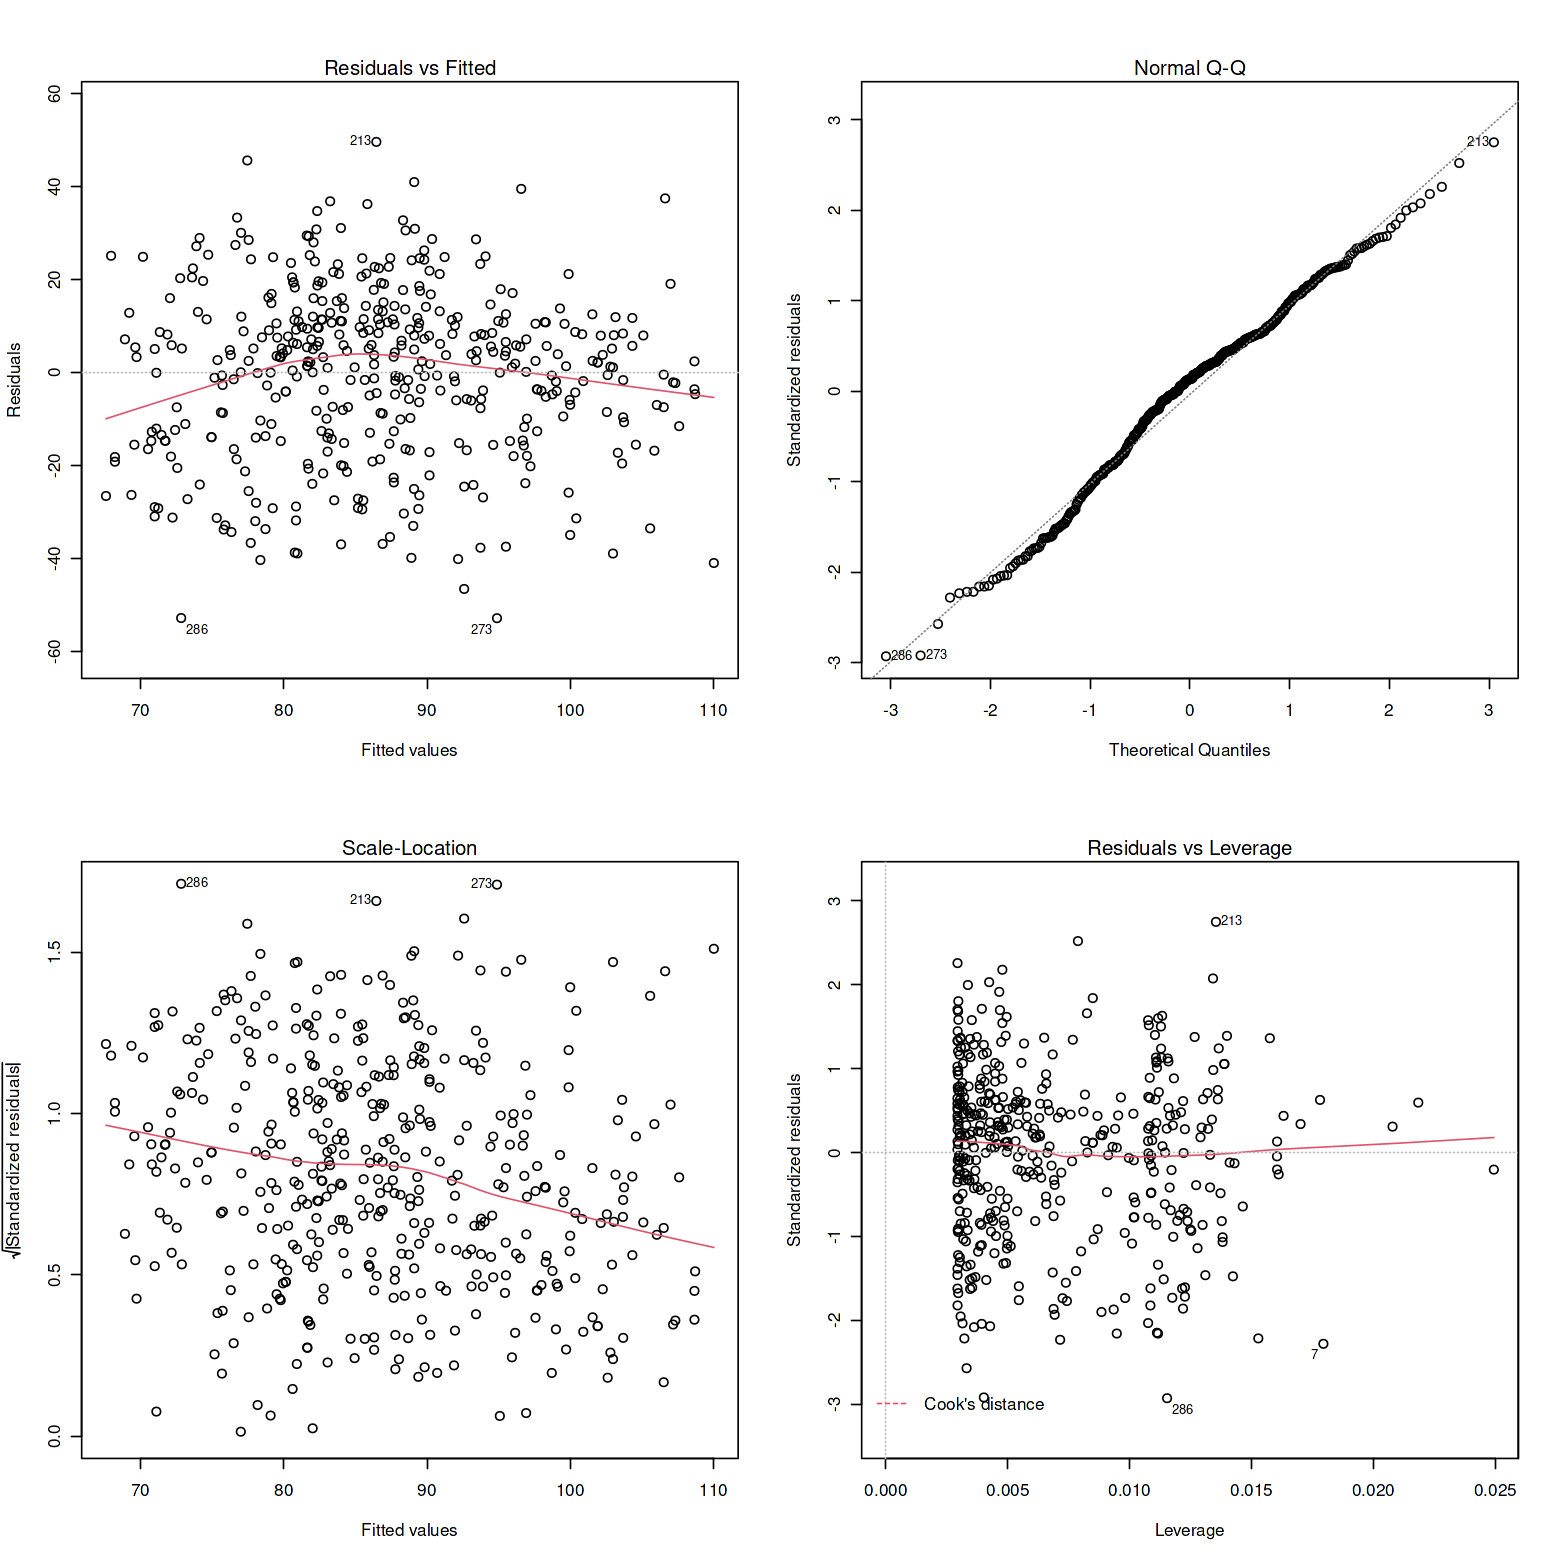

In [54]:
par(mfrow=c(2,2))
plot(ki_bestlmmd)

In [55]:
ki_pred <- predict(ki_bestlmmd , data_ki)

In [56]:
mse(data_ki$kid_score, ki_pred)

[1] 326.6292

In [57]:
rmse(data_ki$kid_score, ki_pred)

[1] 18.07289

In [58]:
R2(data_ki$kid_score, ki_pred)

[1] 0.2141465

-----------

**data_ki kid_score Prediction RandomForest model**

In [95]:
rfmd <- randomForest(kid_score~., data_ki, ntree=300)

In [96]:
rfmd


Call:
 randomForest(formula = kid_score ~ ., data = data_ki, ntree = 300) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 1

          Mean of squared residuals: 332.9744
                    % Var explained: 19.89

In [97]:
ki_rf_pred <- predict(rfmd, data_ki)

In [98]:
mse(data_ki$kid_score, ki_rf_pred)

[1] 254.7797

In [99]:
rmse(data_ki$kid_score, ki_rf_pred)

[1] 15.96182

In [100]:
R2(data_ki$kid_score, ki_rf_pred)

[1] 0.4945935

In [101]:
data_ki_rfpred <- data.frame(actual = data_ki$kid_score, pred = ki_rf_pred)

In [102]:
head(data_ki_rfpred)

,actual,pred
,<int>,<dbl>
1,65,93.27273
2,98,89.78891
3,85,92.89212
4,83,90.24186
5,115,92.21051
6,98,87.21899


---------

# **5. Evaluation**

**Random forest is a better model but, Model has a low r2 score of 0.49.**